In [2]:
# Evaluate the Results
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")
sns.set(font = "arial")
data=pd.read_csv("iteration_results.csv")
data.head(5)
# 1. TotalCost vs Total CO2

,Unnamed: 0,PV,WIND,TotalCost,TotalCO2
0,0,0,0,4028.914949,35.761746
1,1,0,5,4097.261605,35.412873
2,2,0,10,4167.578166,35.056805
3,3,0,15,4239.174884,34.694614
4,4,0,20,4312.630190,34.323380


Text(0.5, 1.0, 'Operational KPIs')

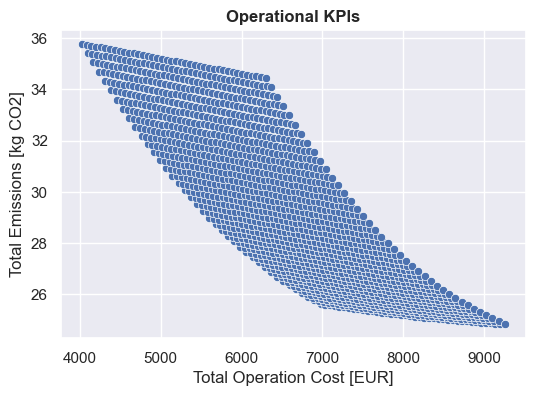

In [9]:
fig,ax=plt.subplots(figsize=(6,4))
sns.scatterplot(data=data, x = "TotalCost", y="TotalCO2",ax=ax)
ax.set_ylabel("Total Emissions [kg CO2]")
ax.set_xlabel("Total Operation Cost [EUR]")
ax.set_title("Operational KPIs", fontweight="bold")

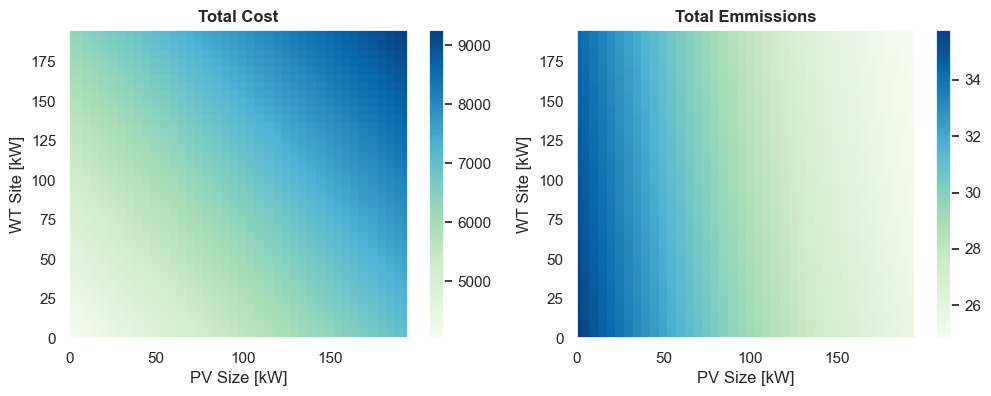

In [39]:
fig,axs=plt.subplots(1,2,figsize=(12,4))
titles = ["Total Cost", "Total Emmissions"]

cols = ["TotalCost", "TotalCO2"]
for i in range(2):
    ax=axs[i]
    x_min = min(data["PV"])
    y_min = min(data["WIND"])
    x_max = max(data["PV"])
    y_max = max(data["WIND"])

    ax.set_xlim(left= x_min, right = x_max)
    ax.set_ylim(bottom= y_min, top = y_max)
    x = np.linspace(x_min,x_max,num=int((x_max-x_min)/5)+1)
    y = np.linspace(y_min,y_max,num=int((y_max-y_min)/5)+1)
    n = len(x)

    X, Y = np.meshgrid(x,y)
    Z = np.zeros((n,n))
    col = cols[i]
    title = titles[i]
    for i in range(n):
        for j in range(n):
            pv=float(x[i])
            wind=float(y[j])
            point = data[(data["PV"]==pv)&(data["WIND"]==wind)][col]
            point = list(point)
            Z[i,j] = point[0] 

    c= ax.pcolor(X, Y, Z,cmap="GnBu")
    ax.set_ylabel("WT Site [kW]")
    ax.set_xlabel("PV Size [kW]")
    ax.set_title(title, fontweight="bold")

    fig.colorbar(c, ax=ax)

In [31]:
point = data[(data["PV"]==5)&(data["WIND"]==5)]["TotalCO2"]
point=list(point)
point


[35.38052176176909]